CODE BLOCK: 1

In [2]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net3
from utils import train, test
import torch.nn.functional as F

CODE BLOCK: 2

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [5]:
!pip install torchsummary
from torchsummary import summary
import torch
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
device=torch.device("mps")
model = Net3()#.to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             910
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 20, 22, 22]           1,820
              ReLU-8           [-1, 20, 22, 22]               0
       BatchNorm2d-9           [-1, 20, 22, 22]              40
           Conv2d-10           [-1, 10, 11, 11]             210
           Conv2d-11             [-1, 10, 9, 9]             910
             ReLU-12             [-1, 10, 9, 9]               0
      BatchNorm2d-13             [-1, 10, 9, 9]              20
           Conv2d-14             [-1, 1

CODE BLOCK: 3

In [6]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [7]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [8]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

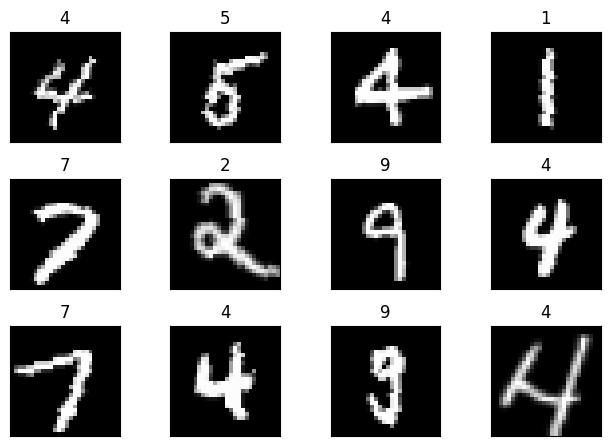

In [9]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [12]:
model = Net3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.1430 Batch_id=117 Accuracy=81.34: 100%|██████████| 118/118 [00:06<00:00, 16.88it/s]


Test set: Average loss: 0.1283, Accuracy: 9609/10000 (96.09%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.0703 Batch_id=117 Accuracy=96.69: 100%|██████████| 118/118 [00:07<00:00, 16.73it/s]


Test set: Average loss: 0.0796, Accuracy: 9773/10000 (97.73%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0817 Batch_id=117 Accuracy=97.60: 100%|██████████| 118/118 [00:07<00:00, 16.44it/s]


Test set: Average loss: 0.0611, Accuracy: 9824/10000 (98.24%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0737 Batch_id=117 Accuracy=97.86: 100%|██████████| 118/118 [00:07<00:00, 16.51it/s]


Test set: Average loss: 0.0389, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5


Train: Loss=0.0554 Batch_id=117 Accuracy=98.15: 100%|██████████| 118/118 [00:07<00:00, 16.51it/s]


Test set: Average loss: 0.0407, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 6


Train: Loss=0.0577 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:07<00:00, 16.41it/s]


Test set: Average loss: 0.0283, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 7


Train: Loss=0.1131 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:07<00:00, 16.27it/s]


Test set: Average loss: 0.0267, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 8


Train: Loss=0.0635 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:07<00:00, 16.39it/s]


Test set: Average loss: 0.0269, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 9


Train: Loss=0.0490 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:07<00:00, 16.44it/s]


Test set: Average loss: 0.0265, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 10


Train: Loss=0.0239 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [00:07<00:00, 16.28it/s]


Test set: Average loss: 0.0267, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 11


Train: Loss=0.0747 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:07<00:00, 16.32it/s]


Test set: Average loss: 0.0261, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 12


Train: Loss=0.1376 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [00:07<00:00, 16.08it/s]


Test set: Average loss: 0.0259, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 13


Train: Loss=0.0726 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:07<00:00, 15.14it/s]


Test set: Average loss: 0.0259, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 14


Train: Loss=0.0467 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:07<00:00, 16.06it/s]


Test set: Average loss: 0.0255, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 5.0000e-04.
Epoch 15


Train: Loss=0.0803 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:07<00:00, 16.67it/s]


Test set: Average loss: 0.0257, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 5.0000e-05.


**Target**
1. Test a more powerful model, a middle-ground.

**Results**
1. Train Acc: 98.72
2. Test Acc: 99.24
3. Parameters: 7050

**Analysis**
1. The model does not improve much in terms of the test accuracy.
2. A nudge in terms of adding an additional layer and thus more grunt might be needed.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.plot()

# Git Push

In [ ]:
!git add .

In [ ]:
!git config --global user.email "me18b059@smail.iitm.ac.in"
!git commit -m Final

In [ ]:
!git push